In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# 0 empty, 1 trap
# initialize
def startWalk(  probOfTrap = .1):
    grid = {}
    grid[(0,0,0)] = 0
    currentLoc = (0, 0, 0)
    steps = 0
    end = False
    return grid, currentLoc, steps, end

In [4]:
# first step
def oneStep(steps, grid, currentLoc, probOfTrap, end):
    steps+=1
    direction = np.random.choice(["x", "y", "z"])
    forwardOrBack = np.random.choice([-1, 1])
    if direction == "x":
        newLoc = (currentLoc[0] + forwardOrBack, currentLoc[1], currentLoc[2])
    elif direction == "y":
        newLoc = (currentLoc[0] , currentLoc[1]+forwardOrBack, currentLoc[2])
    else:
        newLoc = (currentLoc[0] , currentLoc[1], currentLoc[2]+forwardOrBack)

    if newLoc in grid:
        pass
    else:
        trap = np.random.choice([0, 1], p = [1-probOfTrap, probOfTrap])
        grid[newLoc] = trap
        
        if trap == 1:
            end = True
    return steps, grid, newLoc, end

In [5]:
def walkUntilTrap(probOfTrap):
    
    grid, currentLoc, steps, end = startWalk(probOfTrap = probOfTrap)
    while end == False:
        steps, grid, currentLoc, end =  oneStep(steps, grid, currentLoc, probOfTrap, end)
    return steps, grid, currentLoc

In [6]:
walkUntilTrap(.3)

(2, {(0, 0, 0): 0, (0, 0, 1): 0, (1, 0, 1): 1}, (1, 0, 1))

In [7]:
def createDistribution(numRuns, probOfTrap):
    steps = []
    distance = []
    for i in range(numRuns):
        result = walkUntilTrap(probOfTrap)
        steps += [result[0]]
        distance += [np.sqrt(result[2][0]**2 + result[2][1]**2 + result[2][2]**2)]
    return steps, distance

In [8]:
steps, distance = createDistribution(1000, .01)

In [9]:
np.mean(steps)

142.035

In [11]:
np.linspace(0.01,.99, 100)

array([0.01      , 0.01989899, 0.02979798, 0.03969697, 0.04959596,
       0.05949495, 0.06939394, 0.07929293, 0.08919192, 0.09909091,
       0.1089899 , 0.11888889, 0.12878788, 0.13868687, 0.14858586,
       0.15848485, 0.16838384, 0.17828283, 0.18818182, 0.19808081,
       0.2079798 , 0.21787879, 0.22777778, 0.23767677, 0.24757576,
       0.25747475, 0.26737374, 0.27727273, 0.28717172, 0.29707071,
       0.3069697 , 0.31686869, 0.32676768, 0.33666667, 0.34656566,
       0.35646465, 0.36636364, 0.37626263, 0.38616162, 0.39606061,
       0.4059596 , 0.41585859, 0.42575758, 0.43565657, 0.44555556,
       0.45545455, 0.46535354, 0.47525253, 0.48515152, 0.49505051,
       0.50494949, 0.51484848, 0.52474747, 0.53464646, 0.54454545,
       0.55444444, 0.56434343, 0.57424242, 0.58414141, 0.5940404 ,
       0.60393939, 0.61383838, 0.62373737, 0.63363636, 0.64353535,
       0.65343434, 0.66333333, 0.67323232, 0.68313131, 0.6930303 ,
       0.70292929, 0.71282828, 0.72272727, 0.73262626, 0.74252

In [157]:
np.mean(distance)

10.022252372484575

In [92]:
def scanProb():
    pVals = np.logspace(-3,-.01, 100)
    meanStepsL = []
    meanDistanceL = []
    for p in pVals:
        steps, distance = createDistribution(100, p)
        meanStepsL += [np.mean(steps)]
        meanDistanceL += [np.mean(distance)]
    return meanStepsL, meanDistanceL
        

In [93]:
stepL, distL = scanProb()

(array([44., 12., 13.,  7.,  5.,  4.,  6.,  3.,  3.,  3.]),
 array([ 1.00414214,  4.1876763 ,  7.37121046, 10.55474462, 13.73827878,
        16.92181294, 20.1053471 , 23.28888126, 26.47241542, 29.65594958,
        32.83948375]),
 <BarContainer object of 10 artists>)

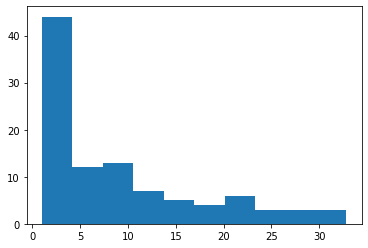

In [97]:
plt.hist(distL)

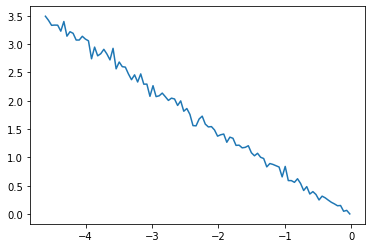

In [95]:
plt.plot(np.log(pVal), np.log(distL))

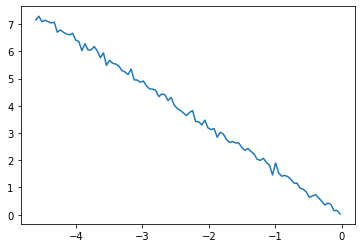

In [96]:
plt.plot(np.log(pVal), np.log(stepL))

In [ ]:
def twoDimensionalHeatMap():

In [99]:
np.histogram(stepL)

(array([68,  9,  6,  3,  1,  5,  1,  1,  5,  1], dtype=int64),
 array([1.030000e+00, 1.476680e+02, 2.943060e+02, 4.409440e+02,
        5.875820e+02, 7.342200e+02, 8.808580e+02, 1.027496e+03,
        1.174134e+03, 1.320772e+03, 1.467410e+03]))

1. We could do more general N dimensions/compare it 
2. Heat map 2d of particle travel distance
3. emission as well as absorption as a walker destruction method
4. how many runs do you need 
5. We could also add line of fit and calculate eqn from slope of log log plot
6. Connect to diffusion